<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Импорт данных

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates). 
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [3]:
# Удаляем пустые данные в столбце
data = data.dropna()
# заново проверяем
missing_data = data.isnull().sum()
missing_data

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

# Проверка гипотез

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

sex
0    5.519821e+07
1    9.860124e+07
Name: salary, dtype: float64


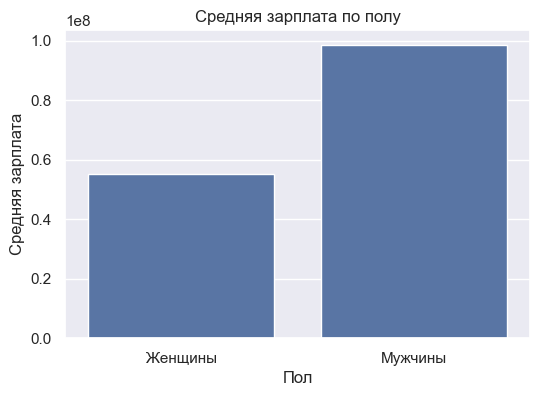

In [4]:
 
# Вычисление средних значений зарплат по полу
mean_salaries_by_sx = data.groupby('sex')['salary'].mean()
print(mean_salaries_by_sx)
# Визуализация средних значений зарплат по полу
plt.figure(figsize=(6, 4))
sns.barplot(x=['Женщины', 'Мужчины'], y=mean_salaries_by_sx)
plt.title('Средняя зарплата по полу')
plt.xlabel('Пол')
plt.ylabel('Средняя зарплата')
plt.show()

* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

profession
Engineer         4.225142e+07
Entertainment    1.952555e+08
Name: salary, dtype: float64


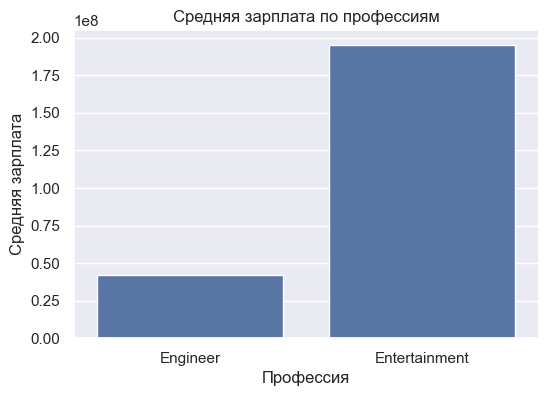

In [5]:
salaries_by_prof = data[data['profession'].isin(['Engineer', 'Entertainment'])]

mean_salaries_by_prof = salaries_by_prof.groupby('profession')['salary'].mean()
print(mean_salaries_by_prof)
# print(salaries_by_prof.groupby('profession')['salary'].describe())


plt.figure(figsize=(6, 4))
#sns.barplot(x=['Engineer', 'Entertainment'], y=mean_salaries_by_prof)
sns.barplot(x=mean_salaries_by_prof.index, y=mean_salaries_by_prof.values)
plt.title('Средняя зарплата по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Средняя зарплата')
plt.show()

* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

     was_married  children        salary  sex    age     profession  \
id                                                                    
10             1       9.0  1.524378e+08    1  100.0         Artist   
18             1       9.0  1.389264e+08    1   99.0         Artist   
26             1       6.0  1.798625e+08    1   13.0  Entertainment   
29             1       6.0  1.716822e+08    1   13.0  Entertainment   
34             1       4.0  4.720396e+07    1   81.0       Engineer   
..           ...       ...           ...  ...    ...            ...   
480            1       9.0  1.047887e+08    1   99.0         Artist   
482            1       6.0  1.264997e+08    1   14.0  Entertainment   
487            1       9.0  1.171769e+08    1  100.0         Artist   
489            1       6.0  1.627892e+08    1   14.0  Entertainment   
494            1       6.0  2.151209e+08    1   13.0  Entertainment   

        home_cost  drive_info  happyness  
id                               

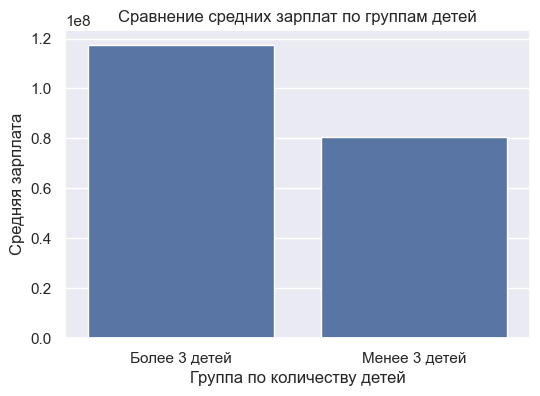

In [6]:
more_three_child = data[data['children'] > 3]
less_three_child = data[data['children'] < 3]

print(more_three_child)

mean_more_three_child = more_three_child['salary'].mean()
mean_less_three_child = less_three_child['salary'].mean()

print("Более 3 детей: ", mean_more_three_child)
print("Менее 3 детей: ", mean_less_three_child)

plt.figure(figsize=(6, 4))
sns.barplot(x=['Более 3 детей','Менее 3 детей'], y=[mean_more_three_child, mean_less_three_child])
plt.title('Сравнение средних зарплат по группам детей')
plt.xlabel('Группа по количеству детей')
plt.ylabel('Средняя зарплата')
plt.show()


* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

profession
Artist    1.021633e+07
Lawyer    1.027300e+07
Name: home_cost, dtype: float64


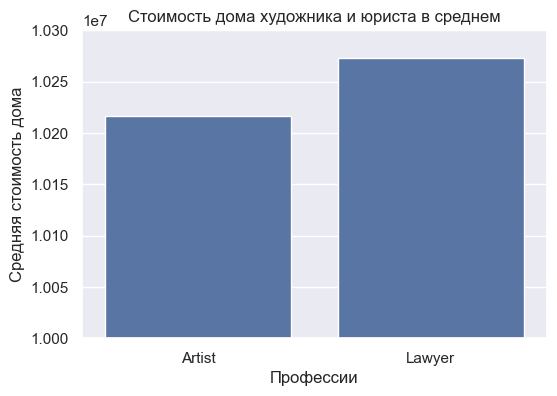

In [7]:
home_cost_by_profession = data[data['profession'].isin(['Artist', 'Lawyer'])]

mean_home_cost_by_profession = home_cost_by_profession.groupby('profession')['home_cost'].mean()
print(mean_home_cost_by_profession)

plt.figure(figsize=(6, 4))
sns.barplot(x=mean_home_cost_by_profession.index, y=mean_home_cost_by_profession.values)

plt.title('Стоимость дома художника и юриста в среднем')
plt.xlabel('Профессии')
plt.ylabel('Средняя стоимость дома')
plt.ylim(10000000, 10300000)  # Установка пределов для оси Y
plt.show()

* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


was_married
0    1.027973e+07
1    1.018017e+07
Name: home_cost, dtype: float64


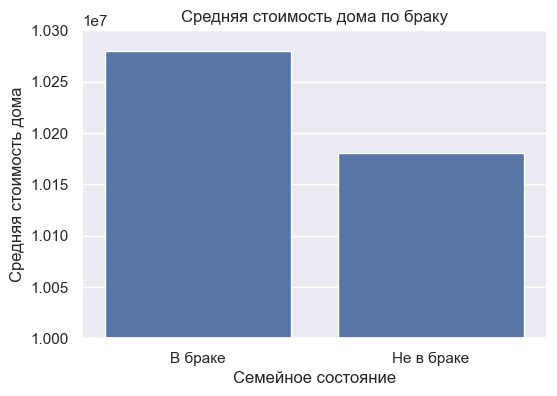

In [8]:
mean_home_cost_by_was_married = data.groupby('was_married')['home_cost'].mean()
print(mean_home_cost_by_was_married)

plt.figure(figsize=(6, 4))
sns.barplot(x=['В браке', 'Не в браке'], y=mean_home_cost_by_was_married)
plt.title('Средняя стоимость дома по браку')
plt.xlabel('Семейное состояние')
plt.ylabel('Средняя стоимость дома')
plt.ylim(10000000, 10300000)
plt.show()

* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

Married woman: 779
Married man: 1946


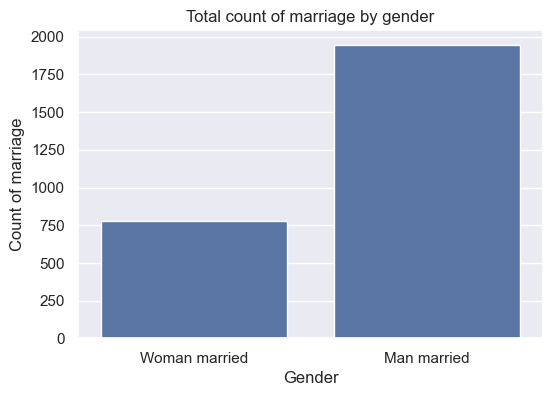

In [9]:
# prostoy variant
woman_married = data[data['sex']==0]['was_married'].sum()
men_married = data[data['sex']==1]['was_married'].sum()

print("Married woman:", woman_married)
print("Married man:", men_married)

plt.figure(figsize=(6, 4))
sns.barplot(x=['Woman married','Man married'], y=[woman_married, men_married])
plt.title('Total count of marriage by gender')
plt.xlabel('Gender')
plt.ylabel('Count of marriage')
plt.show()

In [10]:
# Method with Xi square:
from scipy import stats

contingency_table = pd.crosstab(data['was_married'], data['sex'])

# Performing the chi-square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# contingency_table, chi2, p, dof, ex

print("Матрица сопряженности:")
print(contingency_table)
print("\nЗначение хи-квадрат:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)
print("Ожидаемые значения:")
print(ex)

Матрица сопряженности:
sex            0     1
was_married           
0            360   145
1            779  1946

Значение хи-квадрат: 338.4131966290413
p-значение: 1.414003504264365e-75
Степени свободы: 1
Ожидаемые значения:
[[ 178.07894737  326.92105263]
 [ 960.92105263 1764.07894737]]


Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

Медианная зарплата для женщин: 3156430.751902109
Средняя зарплата для мужчин: 98601242.59353207
Средний уровень счастья женщин с зарплатой выше медианной: 0.3436966620252522
Средний уровень счастья мужчин с зарплатой выше средней: 0.5517951487914489


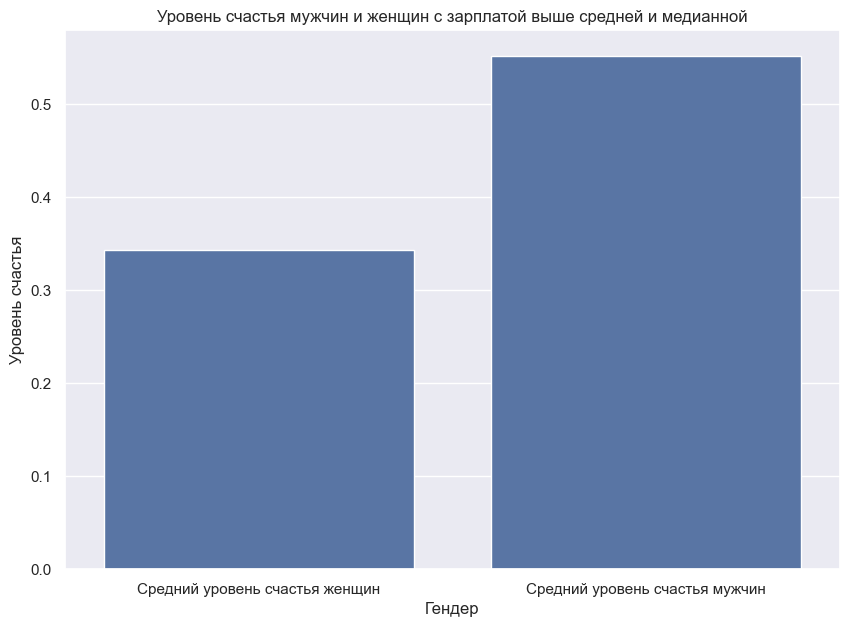

In [15]:
# Шаг 1: Фильтры для мужчин и женщин
women_filter = data['sex'] == 0
men_filter = data['sex'] == 1

# Шаг 2: Зарплаты мужчин и женщин
women_salary = data.loc[women_filter, 'salary']
men_salary = data.loc[men_filter, 'salary']

# Шаг 3: Медианная зарплата для женщин и средняя зарплата для мужчин
woman_salary_median = women_salary.median()
men_salary_mean = men_salary.mean()

# Проверка значений медианной и средней зарплат
print(f"Медианная зарплата для женщин: {woman_salary_median}")
print(f"Средняя зарплата для мужчин: {men_salary_mean}")

women_above_salary_median_filter = women_filter & (data['salary'] > woman_salary_median)
men_above_salary_mean_filter = men_filter & (data['salary'] > men_salary_mean)
# Применение фильтров к исходному DataFrame
women_above_salary_median = data.loc[women_above_salary_median_filter]
men_above_salary_mean = data.loc[men_above_salary_mean_filter]

# Шаг 5: Средний уровень счастья
women_happyness_above_salary_median = women_above_salary_median['happyness'].mean()
men_happyness_above_salary_mean = men_above_salary_mean['happyness'].mean()

# Проверка результатов
print(f"Средний уровень счастья женщин с зарплатой выше медианной: {women_happyness_above_salary_median}")
print(f"Средний уровень счастья мужчин с зарплатой выше средней: {men_happyness_above_salary_mean}")

plt.figure(figsize=(10, 7))
sns.barplot(x=['Средний уровень счастья женщин','Средний уровень счастья мужчин'], y=[women_happyness_above_salary_median, men_happyness_above_salary_mean])
plt.title('Уровень счастья мужчин и женщин с зарплатой выше средней и медианной')
plt.xlabel('Гендер')
plt.ylabel('Уровень счастья')
plt.show()
